# Starting steps for the MNIST dataset.


Image datasets often need significant pre-processing. We start by loading the dataset from the .csv file then we split it into X and y. We also convert the pixel intensites (which are in [0.0,255.0] for grayscale images) to [0,1].

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in the dataset
mnist = pd.read_csv("mnist.csv", header=None)
mnist = mnist.to_numpy()

# split into X and y
X = mnist[:, 1:]
y = mnist[:, 0]

# keep 4s and 9s only - 12,665 examples in total
included_examples = np.isin(y, [4, 9])
X = X[included_examples]
y = y[included_examples]

# convert to [0,1] from grayscale
X = X / 255.0



Plot some of the digits.

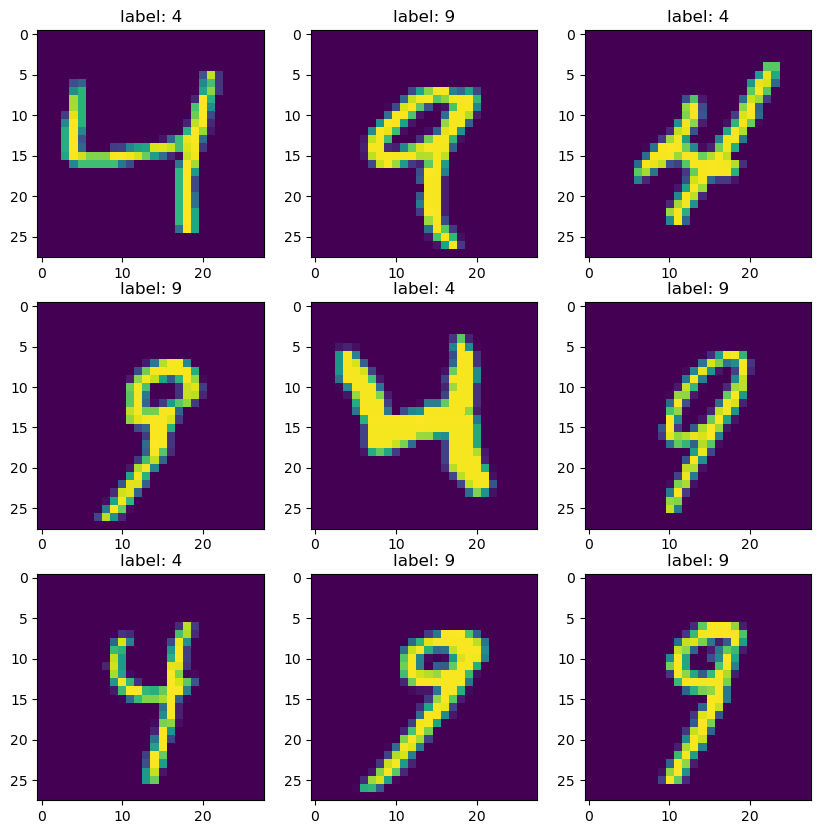

In [3]:

def make_square(vec):
    image_size = int(np.sqrt(len(vec)))
    tmp = np.reshape(vec, (image_size, image_size))
    return tmp

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(make_square(X[3*i + j]))
        ax[i, j].set_title(f"label: {y[3*i + j]}")   

Many of the pixels have zero-variance and so need to be removed (e.g. those at the border, which are zero in every image). We also remove pixels with very small variances as they are likely to be zero-variance in either one of the training or test sets.

In [4]:
X = X[:, np.var(X, axis=0) > 1e-3]